In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy.stats import norm

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\tyagir01\Desktop\JetRail_train.csv')

In [4]:
df.head()

,ID,Date_time,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df_copy = df.copy()

In [7]:
df_copy.Timestamp = pd.to_datetime(df_copy.Date_time, format = '%d-%m-%Y %H:%M')
df_copy.head()

C:\Users\tyagir01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,ID,Date_time,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
df_copy.index = df_copy.Timestamp
df_copy.head()

,ID,Date_time,Count
Date_time,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2


In [9]:
df_copy = df_copy.resample('D').mean()

In [10]:
train =df_copy[0:610]
test = df_copy[610:]

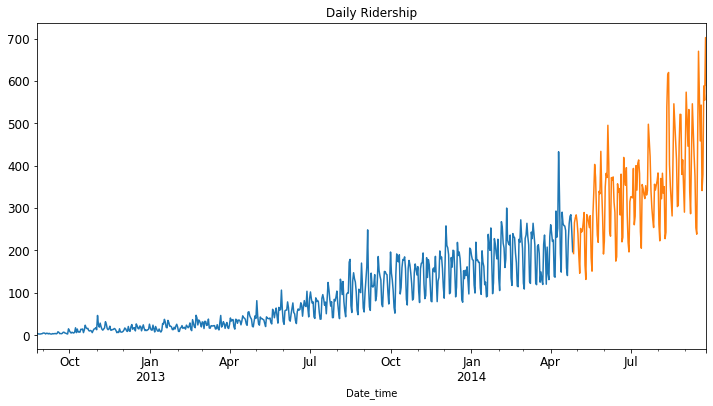

In [11]:
train.Count.plot(figsize=(12,6), title = 'Daily Ridership', fontsize = 12)
test.Count.plot(figsize=(12,6), title = 'Daily Ridership', fontsize = 12)
plt.show()

### Rolling Statistics

In [13]:
roll_mean = train.Count.rolling(window=30).mean()
roll_std = train.Count.rolling(window=30).std()
print(roll_mean, roll_std)

Date_time
2012-08-25           NaN
2012-08-26           NaN
2012-08-27           NaN
2012-08-28           NaN
2012-08-29           NaN
                 ...    
2014-04-22    222.975000
2014-04-23    225.197222
2014-04-24    226.797222
2014-04-25    228.319444
2014-04-26    230.875000
Freq: D, Name: Count, Length: 610, dtype: float64 Date_time
2012-08-25          NaN
2012-08-26          NaN
2012-08-27          NaN
2012-08-28          NaN
2012-08-29          NaN
                ...    
2014-04-22    67.380486
2014-04-23    68.171818
2014-04-24    68.996445
2014-04-25    68.846601
2014-04-26    66.056775
Freq: D, Name: Count, Length: 610, dtype: float64


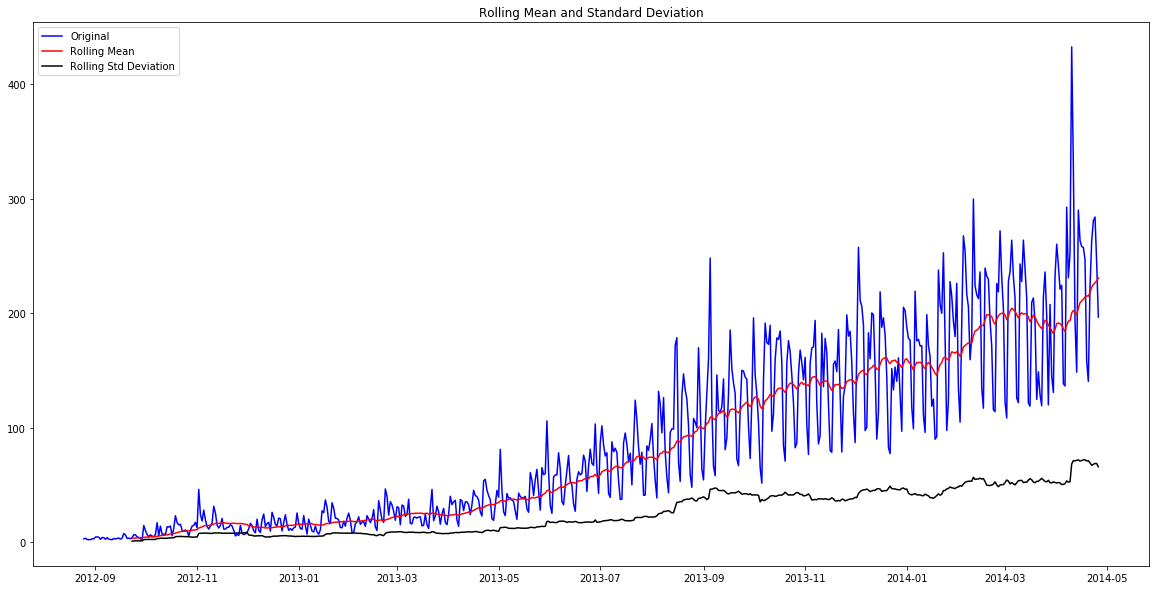

In [14]:
plt.figure(figsize=(20,10))
plt.plot(train.Count, color = 'blue', label = 'Original')
plt.plot(roll_mean, color = 'red', label = 'Rolling Mean')
plt.plot(roll_std, color = 'black', label = 'Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

### Augmented Dicky-Fuller Test

In [15]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky-Fuller Test:')
df_test = adfuller(train['Count'], autolag ='AIC')
df_output  = pd.Series(df_test[0:4], index = ['Test Statistic','P-value','# Lags-Used','# Observations Used'])

for key,value in df_test[4].items():
    df_output['Critical Values (%s)' %key] = value
    
 
print(df_output)

Results of Dicky-Fuller Test:
Test Statistic             0.372422
P-value                    0.980434
# Lags-Used               14.000000
# Observations Used      595.000000
Critical Values (1%)      -3.441388
Critical Values (5%)      -2.866410
Critical Values (10%)     -2.569363
dtype: float64


### Estimating Trend

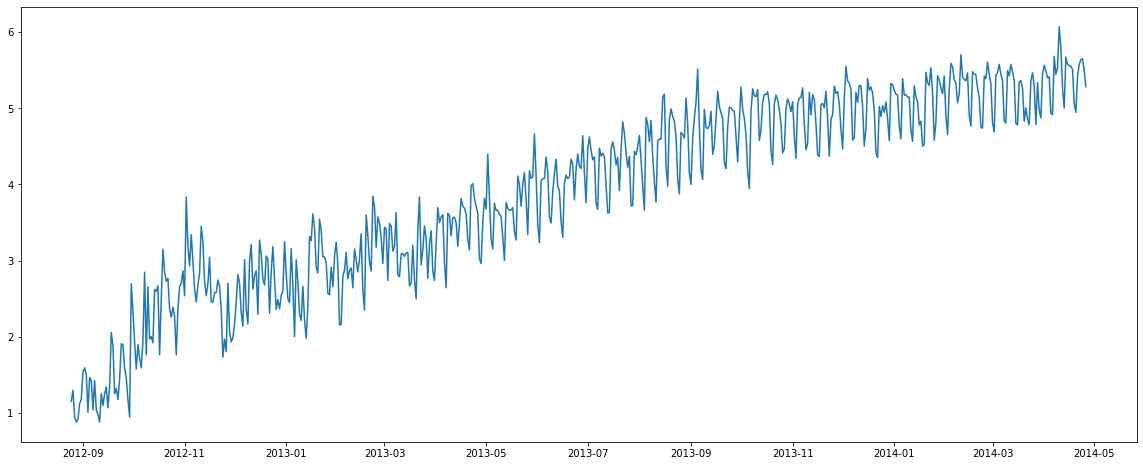

In [16]:
import numpy as np
train_log = np.log(train.Count)
plt.figure(figsize=(20,8))
plt.plot(train_log)

## Moving Average of Log_scale

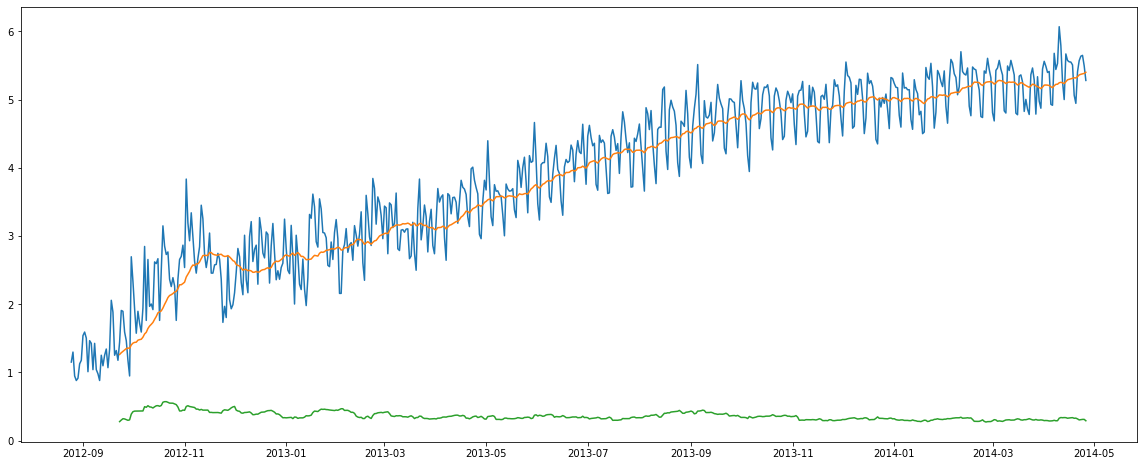

In [17]:
mov_avg = train_log.rolling(window=30).mean()
mov_std = train_log.rolling(window=30).std()
plt.figure(figsize=(20,8))
plt.plot(train_log)
plt.plot(mov_avg)
plt.plot(mov_std)

In [19]:
train_log_minus_MA = train_log - mov_avg
train_log_minus_MA.dropna(inplace=True)
train_log_minus_MA

Date_time
2012-09-23    0.182755
2012-09-24    0.620150
2012-09-25    0.587800
2012-09-26    0.261859
2012-09-27    0.116100
                ...   
2014-04-22    0.208738
2014-04-23    0.265329
2014-04-24    0.271257
2014-04-25    0.111269
2014-04-26   -0.119740
Freq: D, Name: Count, Length: 581, dtype: float64

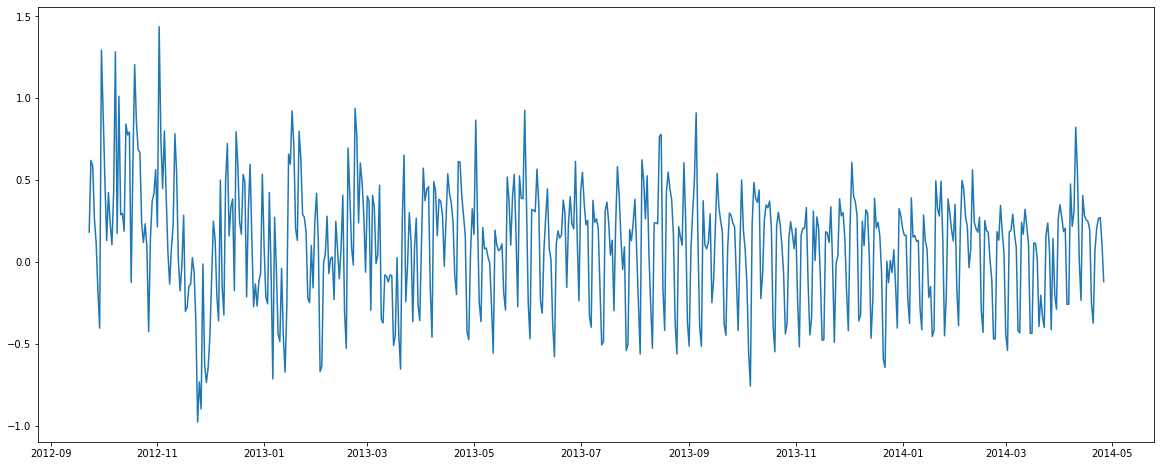

In [20]:
plt.figure(figsize=(20,8))
plt.plot(train_log_minus_MA)

### Code for ADF Test

In [21]:
def test_stationarity(timeseries):
    
    # Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=15).mean()
    movingSTD = timeseries.rolling(window=15).mean()
    
    # Plot Rolling Statistics
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color='green', label = 'Rolling Std Deviation')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Perform Dicky-Fuller Test
    print('Results of Dicky-Fuller Test:')
    df_test = adfuller(timeseries, autolag ='AIC')
    df_output  = pd.Series(df_test[0:4], index = ['Test Statistic','P-value','# Lags-Used','# Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Values (%s)' %key] = value
    print(df_output)

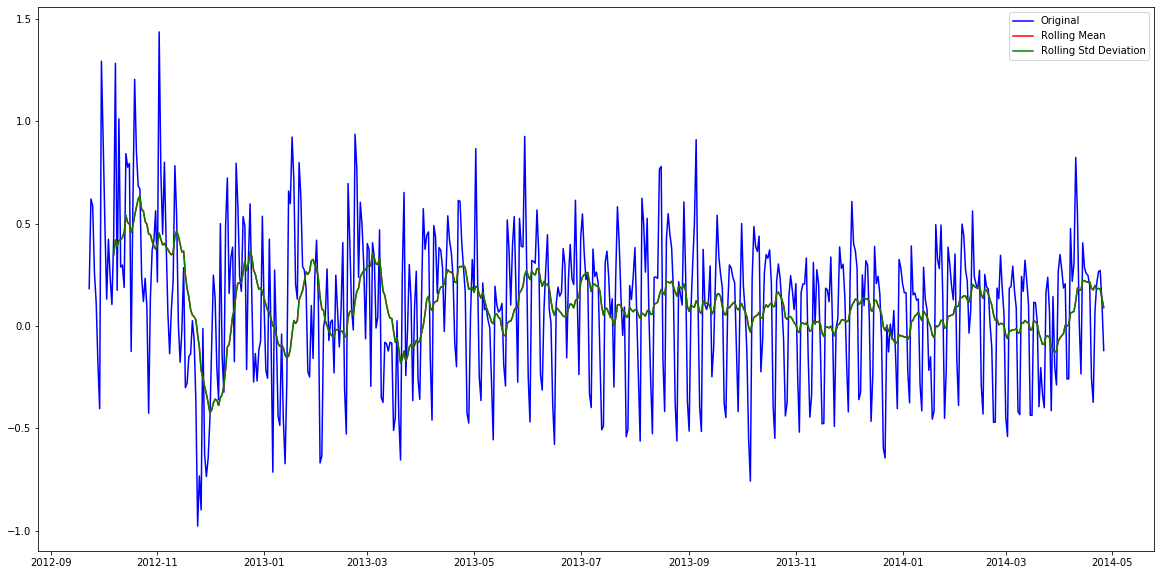

Results of Dicky-Fuller Test:
Test Statistic          -5.957858e+00
P-value                  2.072601e-07
# Lags-Used              1.600000e+01
# Observations Used      5.640000e+02
Critical Values (1%)    -3.441998e+00
Critical Values (5%)    -2.866678e+00
Critical Values (10%)   -2.569506e+00
dtype: float64


In [22]:
test_stationarity(train_log_minus_MA)

### Exponential Decay Weighted average of Time Series

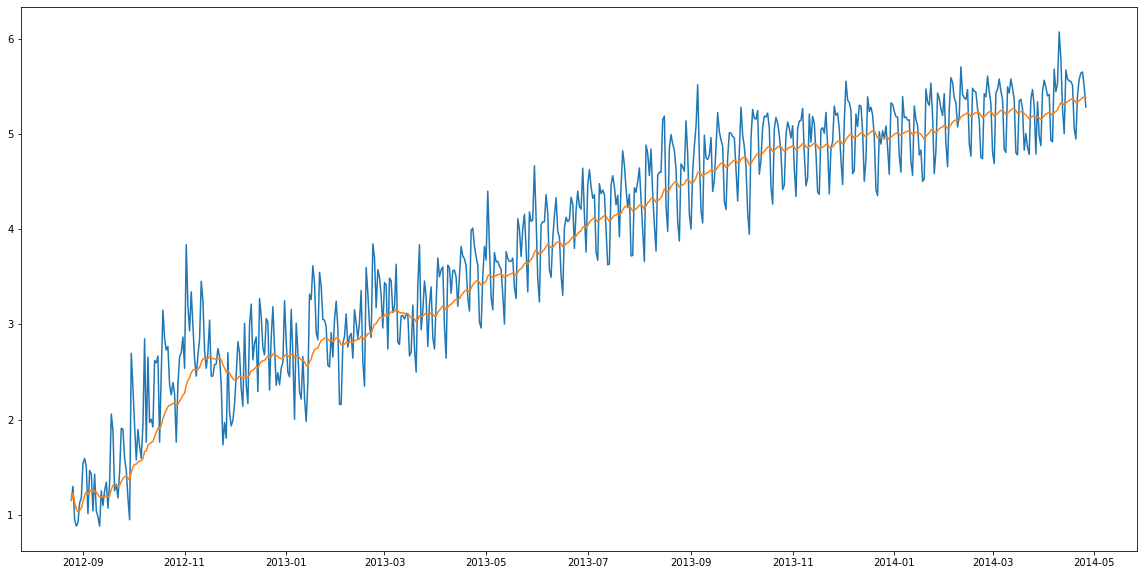

In [23]:
exp_decay_weighted_avg = train_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 
plt.figure(figsize=(20,10))
plt.plot(train_log)
plt.plot(exp_decay_weighted_avg)

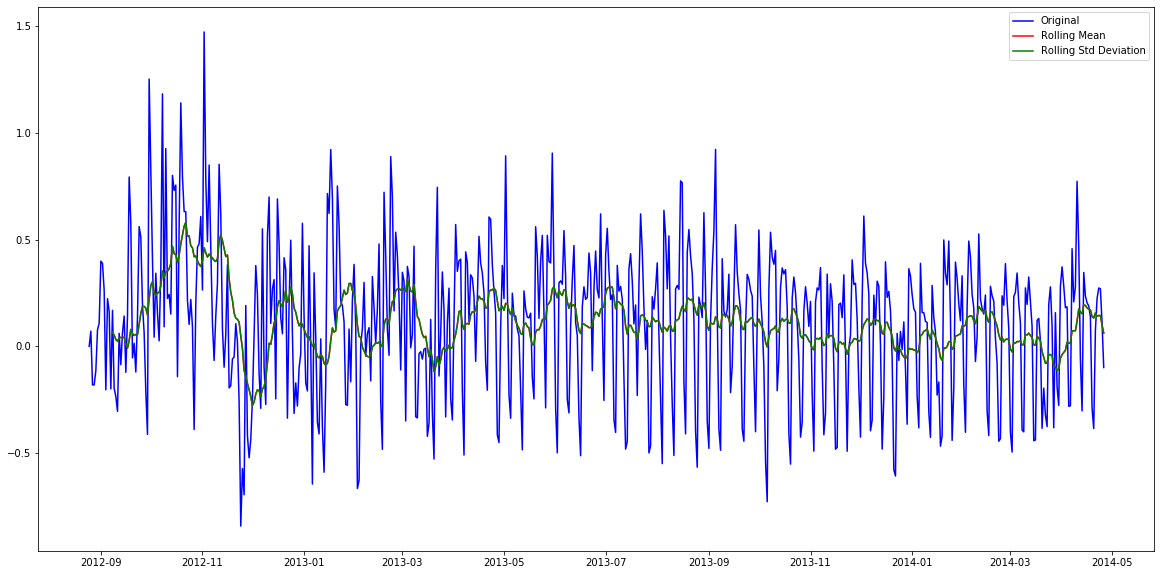

Results of Dicky-Fuller Test:
Test Statistic            -5.353790
P-value                    0.000004
# Lags-Used               16.000000
# Observations Used      593.000000
Critical Values (1%)      -3.441426
Critical Values (5%)      -2.866426
Critical Values (10%)     -2.569372
dtype: float64


In [24]:
log_minus_mov_exp_decay_avg = train_log - exp_decay_weighted_avg
test_stationarity(log_minus_mov_exp_decay_avg)

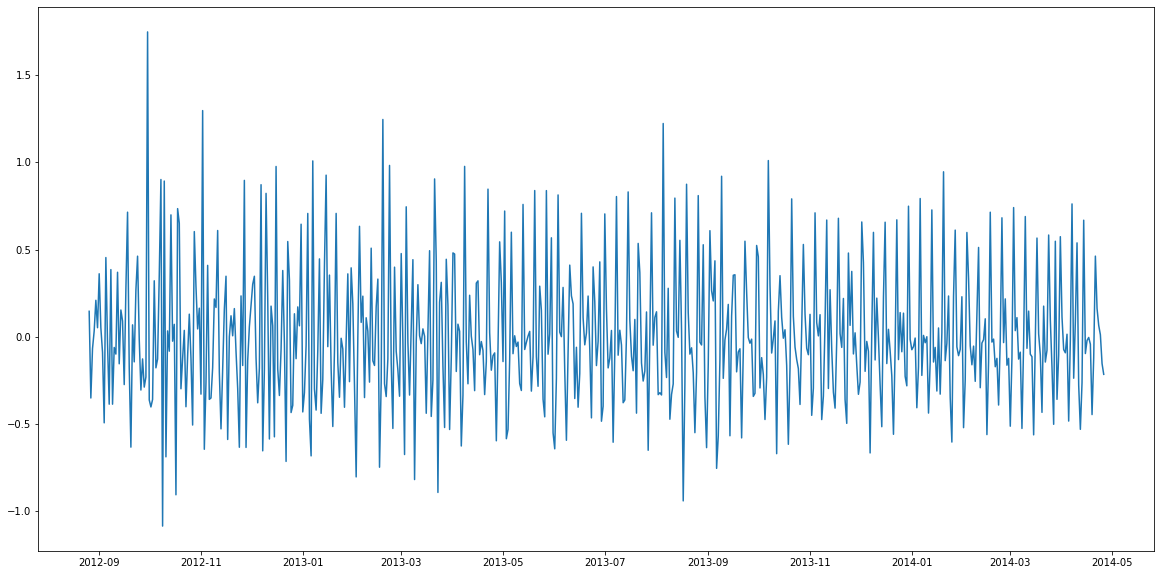

In [25]:
shifted_log_data = train_log - train_log.shift()
plt.figure(figsize=(20,10))
plt.plot(shifted_log_data)

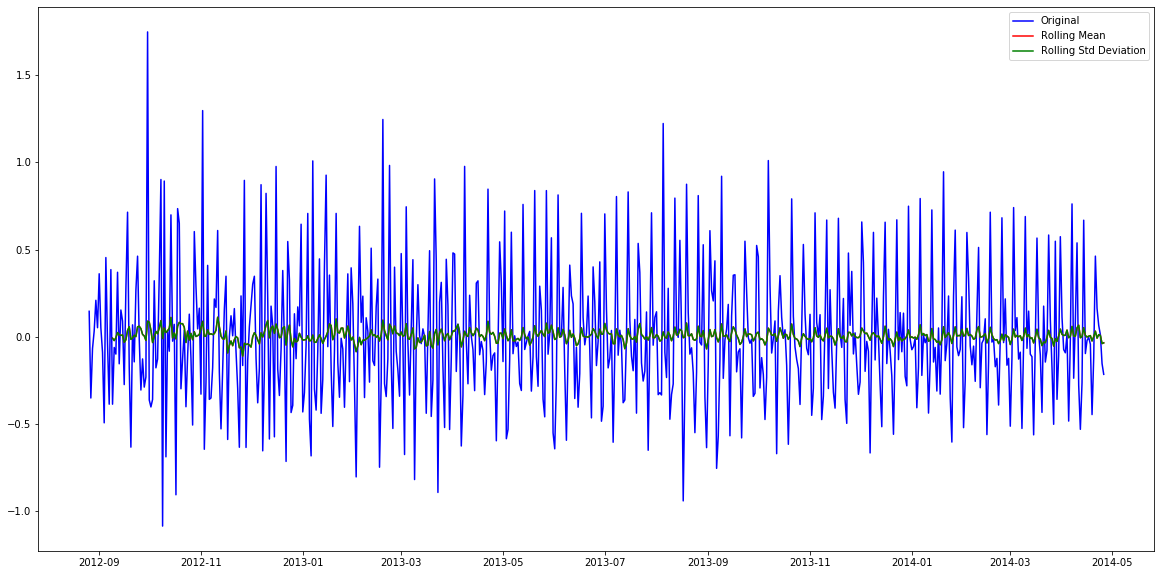

Results of Dicky-Fuller Test:
Test Statistic          -7.839424e+00
P-value                  5.992316e-12
# Lags-Used              1.900000e+01
# Observations Used      5.890000e+02
Critical Values (1%)    -3.441501e+00
Critical Values (5%)    -2.866460e+00
Critical Values (10%)   -2.569390e+00
dtype: float64


In [26]:
shifted_log_data.dropna(inplace=True)
test_stationarity(shifted_log_data)

## To check Trend , Seasonality and Residuals of the Time Series

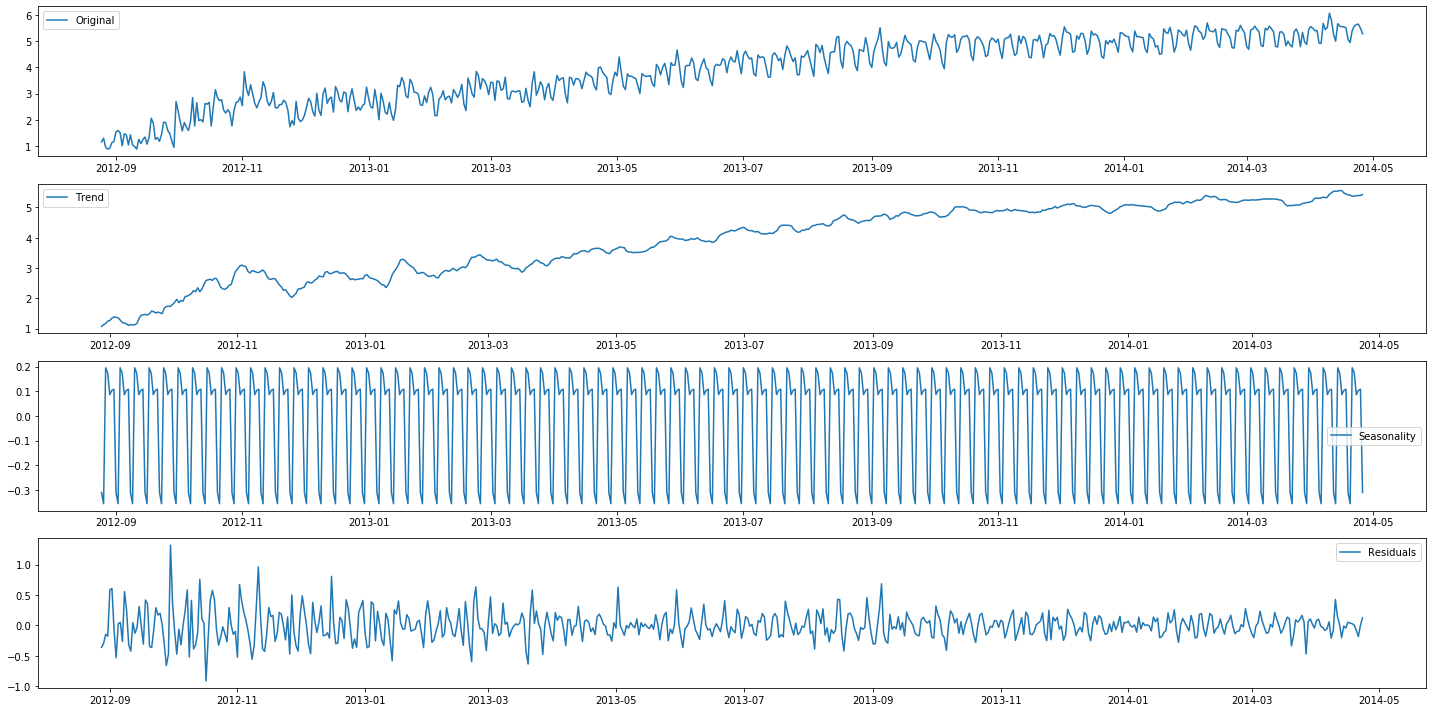

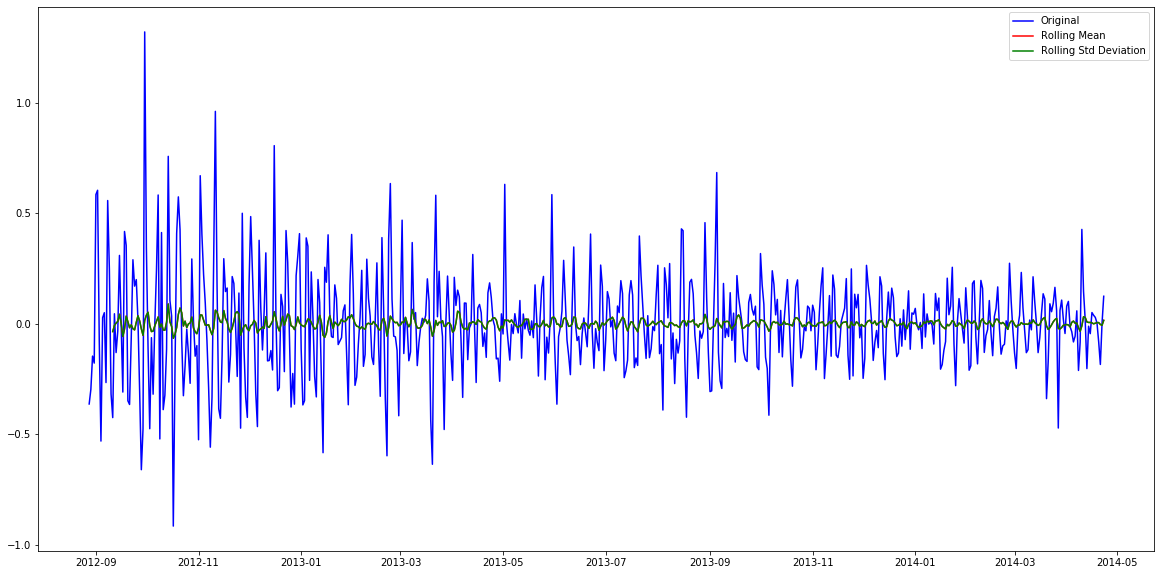

Results of Dicky-Fuller Test:
Test Statistic          -1.037451e+01
P-value                  2.219608e-18
# Lags-Used              1.900000e+01
# Observations Used      5.840000e+02
Critical Values (1%)    -3.441597e+00
Critical Values (5%)    -2.866502e+00
Critical Values (10%)   -2.569412e+00
dtype: float64


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_log)

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonality, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residuals, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposed_log_data = residuals
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)

## ACF & PACF Plots:

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

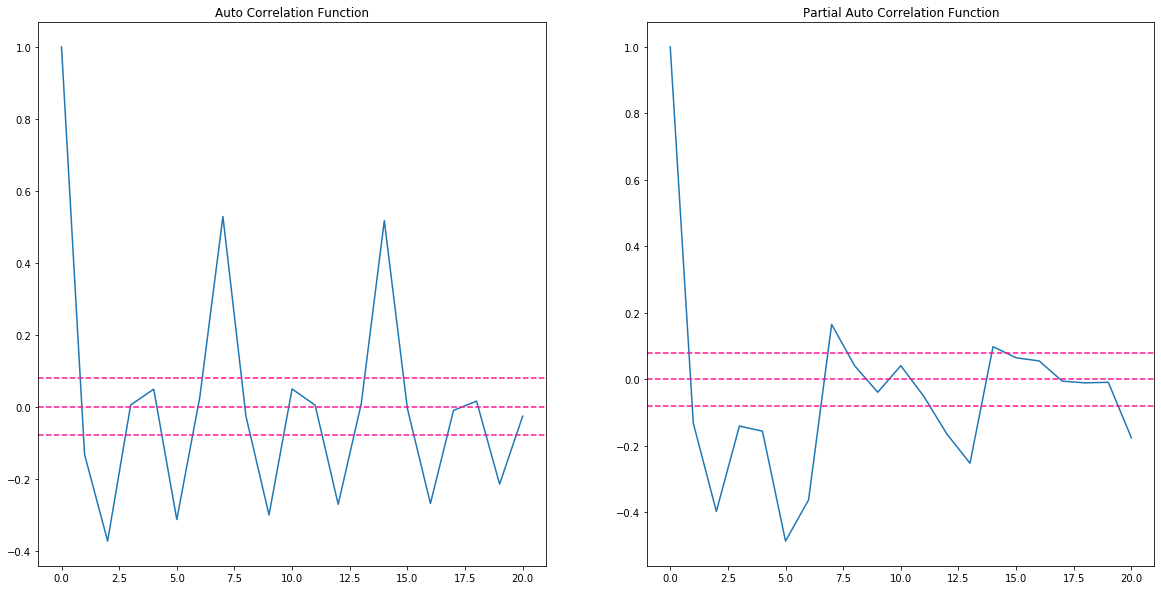

In [28]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(shifted_log_data, nlags = 20)
lag_pacf = pacf(shifted_log_data, nlags = 20, method = 'ols')

plt.figure(figsize=(20,10))
# Plot ACF :
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = '--', color = 'deeppink')
plt.axhline(y = -1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'deeppink')
plt.axhline(y = 1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'deeppink')
plt.title('Auto Correlation Function')

# Plot PACF :
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = '--', color = 'deeppink')
plt.axhline(y = -1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'deeppink')
plt.axhline(y = 1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'deeppink')
plt.title('Partial Auto Correlation Function')

plt.tight_layout

## ARIMA Model 

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Plotting AR Model


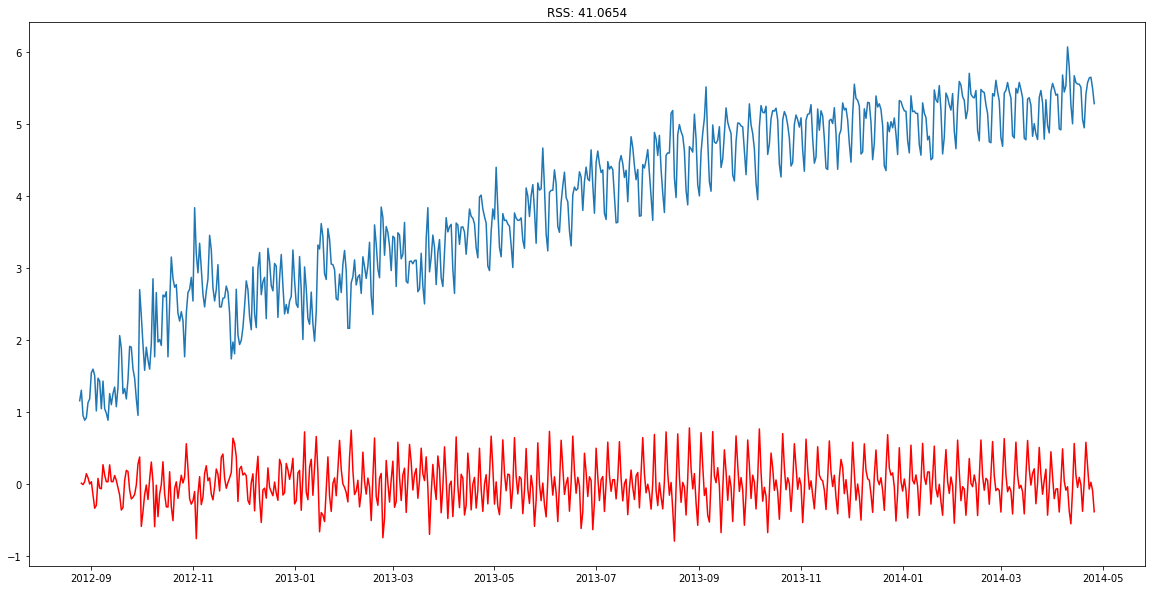

In [29]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
model = ARIMA(train_log, order = (6,1,6))
results_AR = model.fit(disp = -1)
plt.figure(figsize=(20,10))
plt.plot(train_log)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - shifted_log_data)**2))
print('Plotting AR Model')

In [30]:
## Predictions
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date_time
2012-08-26    0.007174
2012-08-27   -0.013115
2012-08-28    0.028763
2012-08-29    0.138704
2012-08-30    0.083753
Freq: D, dtype: float64

In [31]:
## Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date_time
2012-08-26    0.007174
2012-08-27   -0.005941
2012-08-28    0.022822
2012-08-29    0.161526
2012-08-30    0.245279
Freq: D, dtype: float64

In [32]:
predictions_ARIMA_log = pd.Series(train_log.iloc[0], index = train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Date_time
2012-08-25    1.152680
2012-08-26    1.159854
2012-08-27    1.146739
2012-08-28    1.175501
2012-08-29    1.314205
Freq: D, dtype: float64

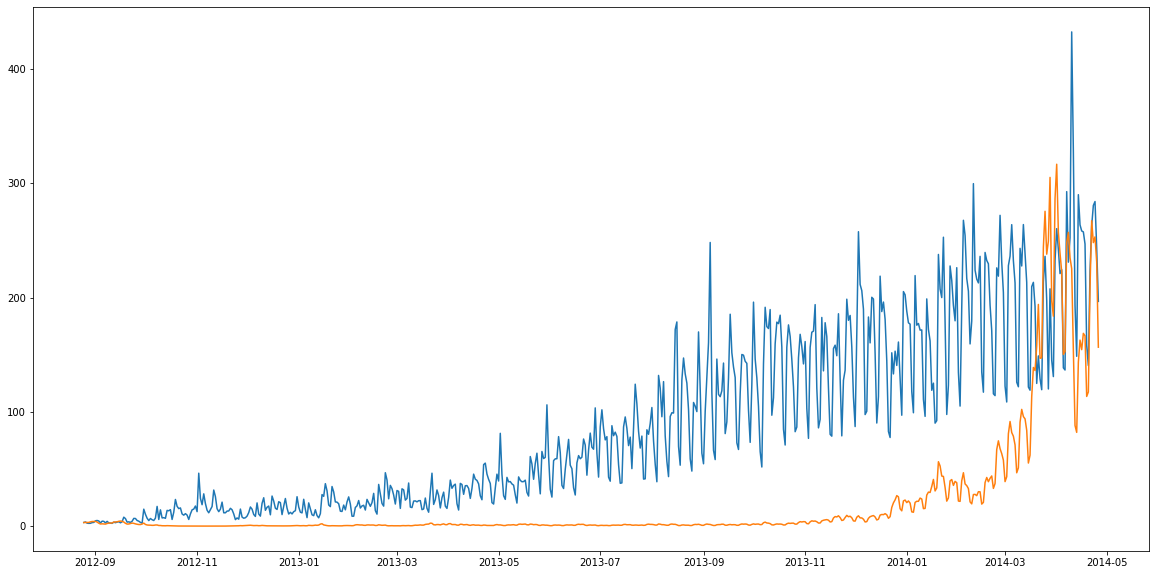

In [33]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(train.Count)
plt.plot(predictions_ARIMA)

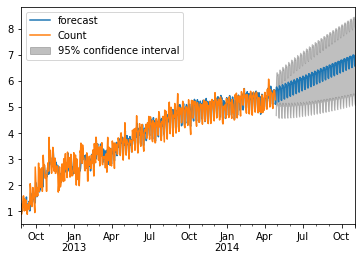

<Figure size 1440x720 with 0 Axes>

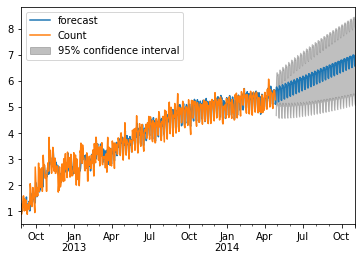

In [34]:
plt.figure(figsize = (20,10))
results_AR.plot_predict(1,800)

In [36]:
submission = results_AR.forecast(steps=213)
submission

(array([5.18502717, 5.61718535, 5.76897189, 5.64110986, 5.70238117,
        5.62290395, 5.2214765 , 5.20116024, 5.65062132, 5.81140207,
        5.68880293, 5.75180029, 5.67387607, 5.2756988 , 5.25379732,
        5.69802416, 5.85813095, 5.73819036, 5.80169536, 5.72503564,
        5.32994066, 5.3064575 , 5.74548094, 5.90489944, 5.78757222,
        5.85157505, 5.776173  , 5.38414647, 5.35911431, 5.79298493,
        5.95170395, 5.83694818, 5.90143924, 5.82728832, 5.43831637,
        5.4117675 , 5.84053553, 5.99854425, 5.88631853, 5.95128827,
        5.87838184, 5.49245055, 5.46441686, 5.88813215, 6.0454201 ,
        5.93568358, 6.00112246, 5.92945379, 5.54654918, 5.51706218,
        5.93577423, 6.09233128, 5.9850436 , 6.05094212, 5.98050439,
        5.60061245, 5.56970324, 5.98346119, 6.13927754, 6.03439887,
        6.10074757, 6.03153387, 5.65464056, 5.62233984, 6.03119246,
        6.18625866, 6.08374969, 6.15053913, 6.08254246, 5.70863369,
        5.67497177, 6.07896749, 6.23327441, 6.13